In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp

In [4]:
%store -r ieee13_mat_compl_ground_truth_08_23_2021

# Item 1. Sensitivity Matrix Completion

We observe a matrix $\mathbf{X}_0 \in \mathbb{R}^{M \times N}$ which we assume to have $\textbf{rank}(\mathbf{X}_0) = R << M,N$

Text(0.5, 1.0, 'IEEE 13 Voltage Magnitude Sensitivity Matrix')

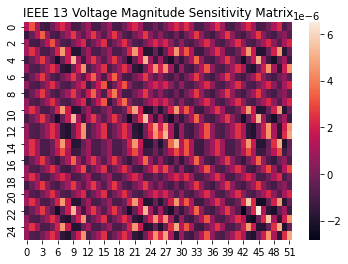

In [8]:
S = ieee13_mat_compl_ground_truth_08_23_2021['S_IEEE13']
sns.heatmap(S)
plt.title("IEEE 13 Voltage Magnitude Sensitivity Matrix")

## 1.1 Test this assumption:

Compute the truncated singular value decomposition representation using the Eckhart Young Theorem.

In [17]:
u,sigma,vt = np.linalg.svd(S)
print("Singular value vector: ",sigma.shape,sigma)

Singular value vector:  (26,) [4.41858831e-05 3.88814386e-05 1.84365903e-05 6.86546494e-06
 5.50587238e-06 2.85999983e-06 1.90708853e-06 1.85892687e-06
 1.49572390e-06 1.28127193e-06 1.18269446e-06 1.00567439e-06
 8.46469727e-07 8.15508511e-07 5.68108758e-07 4.43815107e-07
 4.08220612e-07 3.80413821e-07 3.56552725e-07 3.28873273e-07
 2.71675982e-07 2.51829259e-07 2.46379256e-07 2.04116926e-07
 1.70464206e-07 1.41225270e-07]


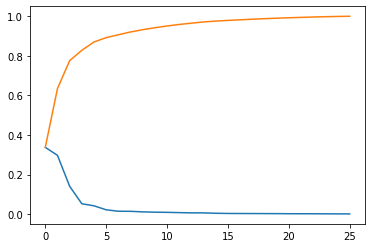

In [19]:
sigma_total = np.sum(sigma)
normed_sigma = sigma/sigma_total
cum_sigma = np.cumsum(normed_sigma)
plt.plot(normed_sigma,label="Normalized Singular Values")
plt.plot(cum_sigma,label="Cummulative Singular Values")

In [9]:
def solve_mat_complete_problem(X,constraints):
    prob = cp.Problem(cp.Minimize(cp.normNuc(X)),constraints=constraints)
    return prob.solve()

# Item 2: Low-Rank Matrix *Recovery*

Low-Rank Matrix *Recovery* is distinct from Low-Rank matrix *approximation*. 

Instead of observing an incomplete matrix $\mathbf{X}_0$, We observe a "linear measurement" 

$$
\bar{\mathbf{d}} \approx \mathcal{A}(\mathbf{X}) + \mathbf{z} \in \mathbb{R}^L
$$

Where $\mathcal{A} : \mathbb{R}^{M \times N} \mapsto \mathbb{R}^{L}$ is a "linear measurement operator"

2.0